<a href="https://colab.research.google.com/github/rweqfsdavxcz/Tutorials/blob/master/Copy_of_02_integrals_of_multivariable_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.style.use('seaborn-white')

# Regular Integration

What is an integral?  Again, we can think of this in 2 major ways:

1. the anti-derivative (inverse operation), and 
1. area under the curve defined by $f(x)$.

Integrals also come in two flavors

1. definite, where you calculate a value, and
1. indefinite, where you derive a function.

Let's make sure we truly understand what is happening when we integrate, $f(x)$, a function of a single vairable, before we attempt to explore functions of 2 variables.



## Integral as an area under the curve

Here is a code that generates the cannonical "$x^2$ Riemann  sum" that you see in every calculus textbook on the planet.

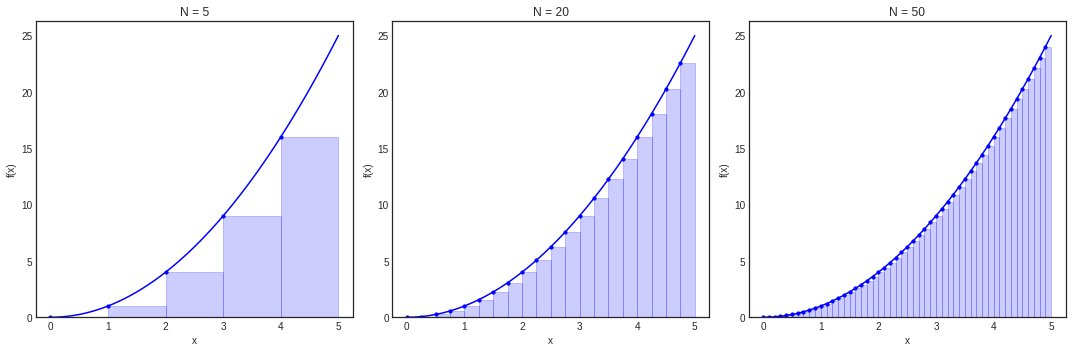

In [0]:
def rs_plot(func,a,b,N,type='left',ax=None):
    #=== what axis? ===#
    if ax == None:
        ax = plt.gca()

    #=== plotting function f(x) ===#
    smooth_factor = 10
    x_plot = np.linspace(a, b, smooth_factor * N + 1)
    ax.plot(x_plot, f(x_plot), 'b-')
    
    #=== choosing type of sum ===#
    samples = np.linspace(a, b, N + 1)
    if type == 'mid':
        x = (samples[:-1] + samples[1:]) / 2
        align = 'center' # center for midpoint
        width = (b-a)/N 

    elif type == 'left':
        x = samples[:-1]
        align = 'edge' # edge expands right so scatter point is on left
        width = (b-a)/N 
    
    elif type == 'right':
        x = samples[1:]
        align = 'edge'
        width = -(b-a)/N # make width expand left so scatter point on right
    else:
        raise ValueError("type must be 'left', 'mid', or 'right'")

    #=== plotting the Riemann sum ===#
    ax.bar(x, f(x), width=width, align=align, color = 'blue', edgecolor='blue', alpha=0.2)
    ax.scatter(x,f(x),c='b',marker='o',s=10)


def f(x):
    return x**2

a = 0
b = 5
N = [5,20, 50]

fig = plt.figure(figsize=(5*len(N),5))
for n in N:
    index = N.index(n)+1
    ax = fig.add_subplot(1,len(N),index)
    rs_plot(f,a,b,n,type='left')
    ax.set_title(f'N = {n}')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
plt.tight_layout()
plt.show()

An integral is a way of measuring the area under the curve of a function by making very small approximate areas and adding them all up.  In the theoretical case, the areas have 'zero' thickness.  To get an exact value, we are actually adding infinite vertical *lines* to get the exact area.  This is why the expression

\begin{equation}
    \int dx = x
\end{equation}

is true: because adding up all of the "points" dx, (remember, zero thickness) we end up with a line!  When there is no height function, $f(x)$, we area actually just adding up points!

## Integral as "undoing the derivative"

WE also conceptually know that the derivative can be used to "undo" a derivative.  The operations of differentitaion and integration are inverse operations where each can undo the other.  If we have a function $f(x)$ then the follow are true:

\begin{equation}
    \int \frac{df}{dx} dx = f(x) + C
\end{equation}

and 

\begin{equation}
    \frac{d}{dx}\left(\int f(x) dx\right) = f(x)
\end{equation}



# Double Integration

Let's extrapolate forward the ideas of a single integral to a double integral.  Performing a double integral on a function of more than one variable, such as $f(x,y)$, can be interpreted as

1. undoing *partial* derivatives, and
1. *volume* under a *surface* defined by $f(x,y)$.

Just as we have with single integrals, double integrals can be either definite integrals or indefinite integrals.



## Double integral as volume under the surface

Let's explore this concept with the function $f(x,y) = x^2 -2xy+y^2$, which visually looks like folding a piece of pizza before eating it.

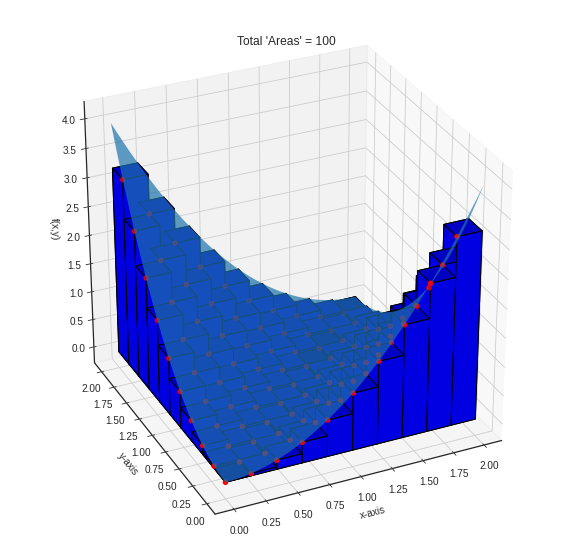

In [0]:
def rs_plot_2d(func,a,b,N,ax=None):
    #=== What axis? ===#
    if ax == None:
        ax = plt.gca()

    #=== plotting the surface F(x,y) ===#
    smooth_factor = 4
    scaled_points = smooth_factor*N
    x_plot = y_plot = np.linspace(xmin,xmax,scaled_points+1)
    X_plot,Y_plot = np.meshgrid(x_plot,y_plot)
    Z_plot = F(X_plot,Y_plot)
    ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=scaled_points, cstride=scaled_points,alpha = 0.7)

    #=== plotting the individual dV elements ===#
    x_bar = y_bar = np.linspace(xmin,xmax,N,endpoint=False)
    X_bar, Y_bar = np.meshgrid(x_bar,y_bar)
    Z_bar = F(X_bar,Y_bar)

    X_bar = X_bar.ravel()
    Y_bar = Y_bar.ravel()
    Z_bar = Z_bar.ravel()

    bottom = np.zeros_like(Z_bar)
    width = depth = (xmax-xmin)/(N)

    ax.bar3d(X_bar, Y_bar, bottom, width, depth, Z_bar, shade = True,color='blue',edgecolor='black')
    ax.scatter(X_bar, Y_bar, Z_bar, marker ='o', c = 'red')

def F(x,y):
    return x**2-2*x*y+y**2

xmin = 0
xmax = 2
samples = 10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
rs_plot_2d(F,xmin,xmax,samples)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('f(x,y)')
ax.set_title(f"Total 'Areas' = {samples*samples}")
ax.view_init(30,245)
plt.show()

## Evaluation of the definite double integral

How would we evaluate this integral by hand?  How would we compute this?  How would we even write it?

The following is **short hand notation** for a double integral

\begin{align}
    ~&\int f(x,y) \; dA \quad \text{where} \\
    ~&\int \text{ means "add up all the..."} \\
    ~&f(x,y) \text{ means "height at a given position" } (x,y) \phantom{\int}\\
    ~&dA \text{ means "tiny area"}
\end{align}<br>

Putting that all together, $\int f(x,y) \; dA$ means "add up all the heights times the little areas" or "add up all the little volumes." However, this is the **short hand version** is is not meant to be evaluated!  We need to perform integration with respect to the variables in the function $f$, which would be $x$ and $y$.

For evaluation purposes, we would actually write the integral as

\begin{align}
    \int \; \int f(x,y) \; dx \; dy
\end{align}

to *explicitly* note that we are integrating with respect to the variables $x$ and $y$.  Another way of looking at it is, if $dx$ and $dy$ are tiny width and tiny depth, then $dx \cdot dy = dA$, tiny area.  Since there are now two differentials, we must match them each with their own $\int$ symbol.

Now actually carry out the computation, we would write it like 

\begin{align}
    \int\limits_{x=0}^{x=2} \; \int\limits_{y=0}^{y=2} \; f(x,y) \;dy \; dx
\end{align}

Why did we write it this way with $dx$ and $dy$ "reversed?"  Because we have to make sure that the appropriate integral is taken.  Think of the above as

\begin{align}
    \int\limits_{x=0}^{x=2} \; \left[\; \int\limits_{y=0}^{y=2} \; f(x,y) \;dy\right] \; dx
\end{align}

There must be agreement between the limits on $\int$ and the differential!

Now let's finally compute the integral.

\begin{align}
    V = \; &\int\limits_{x=0}^{x=2} \; \int\limits_{y=0}^{y=2} \; f(x,y) \;dy \; dx \\
    = \; &\int\limits_{x=0}^{x=2} \; \int\limits_{y=0}^{y=2} \; x^2-2xy+y^2 \;dy \; dx \\
    = \; &\int\limits_{x=0}^{x=2} \; \left[ \; x^2y-xy^2+\frac{1}{3}y^3 \right]_{y=0}^{y=2} \; dx \\
    = \; &\int\limits_{x=0}^{x=2} \;  2x^2-4x+\frac{8}{3} \; dx \\
    = \; &\left.\frac{2}{3}x^3-2x^2+\frac{8}{3}x \; \right|_{x=0}^{x=2} \\
    = \; &\boxed{\frac{8}{3}}
\end{align}

## Double integral as "undoing the (partial) derivative"

Let's change the function now just to work with something different.  Our new function is $f(x,y) = 4xy^2 + 6x + y^3$.  Let's perform some partial derivatives.  Since double integration involves integrating backwards with respect to $y$, and then with respect to $x$, let's take partial derivatives in the order $\frac{\partial}{\partial y}\left(\frac{\partial f}{\partial x}\right) = \frac{\partial^2}{\partial y \; \partial x} = f_{xy} = \partial_{xy}f$ (just the many different ways to represent the exact same concept).

\begin{align}
    &\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}\left(4xy^2+6x+y^3\right) = 4y^2+6 \\[10pt]
    &\frac{\partial }{\partial y}\left(\frac{\partial f}{\partial x}\right) = \frac{\partial}{\partial y}\left(4y^2+6\right) = 8y 
\end{align}

Now let's rebuild $f(x,y)$ from $f_{xy}$ through double indefinite integration.

\begin{align}
    f(x,y) &= \int \; \int 8y \; dy \; dx \\[10pt]
    &= \int \left[4y^2 + g(x) \right] \; dx\\[10pt]
    &= \; 4xy^2 + h(y) + \int g(x) \; dx
\end{align}

We can see that it is mostly correct, but how do we recover the functions $g(x)$ and $h(y)$?  This is certainly non-trivial and something that we are not even going to do right now!  We would need extensive information about the function to determine what these inital functions are!

But there is good news:  the gradient that we discussed *can* be worked backwards through integrating partial derivatives! The gradient of $f$ is

\begin{align}
    \nabla f = \frac{\partial f}{\partial x}\hat{\imath} + \frac{\partial f}{\partial y}\hat{\jmath} = \left(4y^2+6\right)\hat{\imath} + \left(8xy + 3y^2\right)\hat{\jmath}
\end{align}

Let's undo each of the partial derivatives and see what we are left with.

\begin{align}
    f = \int \frac{\partial f}{\partial x} \; dx = 4xy^2+6x+h(y)\\[10pt]
    f = \int \frac{\partial f}{\partial y} \; dy = 4xy^2+y^3+g(x)
\end{align}

Notice that in those integrals we actually have all of the terms of the original function, $f(x,y)$.  In fact, each of the unique terms *is* $f(x,y)$.  This will always be the case as can be seen by "term matching" from each expression.  Both of them are equal to $f(x,y)$  This can only be true if the mystery $h(y)$ in the top integral is equation to $y^3$ in the bottom integral and the same is true for $6x$ and $g(x)$.

We can rebuild our original functions from single partial derivatives (if we have all of them), but to rebuild from higher order partial derivatives of a function, it is very difficult to do that without extensive knowledge of the original function.